In [88]:
%pip install qiskit-ibm-runtime
%pip install qiskit_aer
%pip install qiskit
%pip install pylatexenc
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [109]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex #https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer.primitives import Sampler as primSampler
import matplotlib.pyplot as plt
import numpy as np

In [90]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="0a36966977a20de04e025a331253d45c66f8f0139cbb352cb382c5cfee983a61ee15dc87df60f9d918d753e8009d52b1270f6e67f04e3ee4a09165246759aac1", set_as_default=True, overwrite=True)

In [91]:
service = QiskitRuntimeService()

In [92]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [93]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure(0,0)

In [94]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circuit, backend = simulator).result()
statevector = result.get_statevector()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


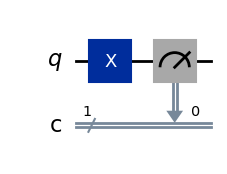

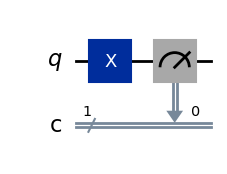

In [95]:
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

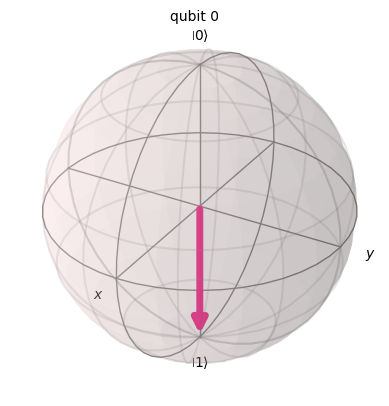

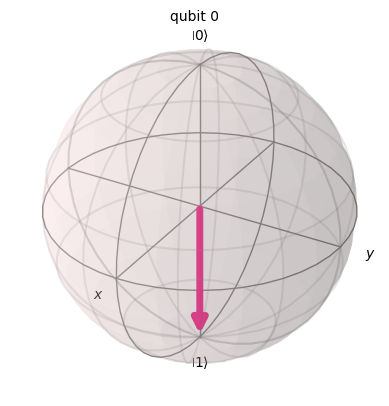

In [96]:
plot_bloch_multivector(statevector)

In [97]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, backend = backend)
result = simulator.run(transpiled_circuit, shots=1020).result()

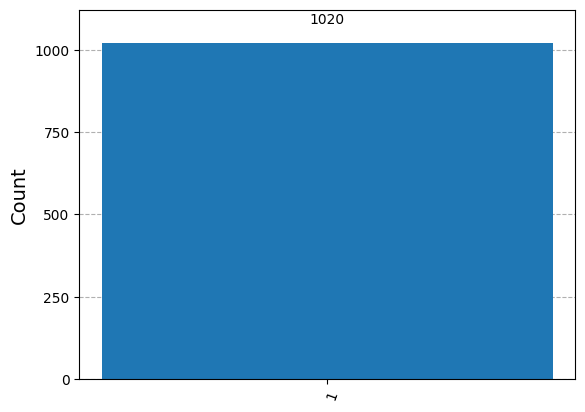

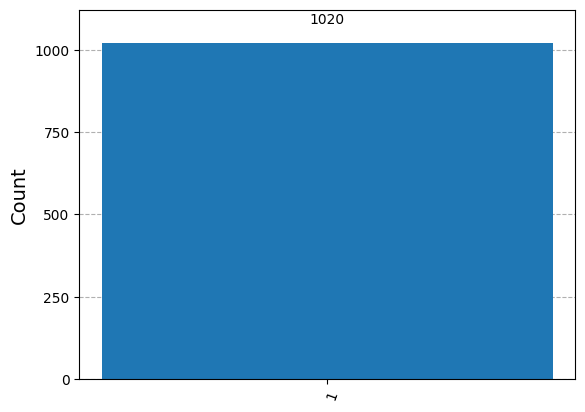

In [98]:
counts = result.get_counts()
plot_histogram(counts)

In [106]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
primCircuit = circuit

In [100]:
job = simulator.run(circuit)
result = job.result()
unitary = result.get_unitary()
print(array_to_latex(unitary))
print(unitary)

<IPython.core.display.Latex object>
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [101]:
serivce = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
job = Sampler(backend).run([circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cyv94ha4raf0008eky8g
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-02-20 02:25:19', stop='2025-02-20 02:25:20', size=4096>)])}, 'version': 2})


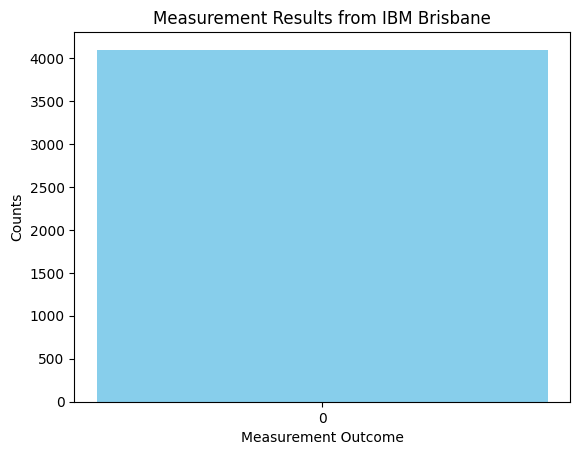

In [111]:
# Extract the BitArray from the SamplerPubResult
bit_array = result[0].data.c  # Access the 'c' field of DataBin

# Convert BitArray to counts dictionary
# Use get_counts() if available, otherwise manually count
try:
    # Attempt to use built-in method if available (depends on Qiskit version)
    counts = bit_array.get_counts()
except AttributeError:
    # Manual counting as fallback
    counts = {'0': 0, '1': 0}
    # Assuming single qubit, access the binary data directly
    for shot in bit_array.array:  # Use .array to access raw data
        outcome = str(shot)  # Convert to string ('0' or '1')
        counts[outcome] = counts.get(outcome, 0) + 1

# Prepare data for plotting
states = list(counts.keys())
values = list(counts.values())

# Plot histogram
plt.bar(states, values, color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.title('Measurement Results from IBM Brisbane')
plt.show()